# Regression on the sphere

In [1]:
from src.manifolds.S2 import *
M = S2()
print(M)

from src.plotting import *
%matplotlib notebook

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


2d sphere (ellipsoid parameters [1. 1. 1.], spherical_coords: False)


In [2]:
# Riemannian structure
from src.Riemannian import metric
truncate_high_order_derivatives = True
metric.initialize(M)

In [3]:
from src.plotting import *
%matplotlib notebook
plt.rcParams['figure.figsize'] = 7, 7

In [4]:
from src.statistics.Regression.params import *

# initialize
n_steps.set_value(100)

n_samples.set_value(20)
mx.set_value(2)

# Obs: takes time to load
from src.framebundle import FM
from src.stochastics import stochastic_development
FM.initialize(M)
stochastic_development.initialize(M)

from src.statistics.Regression import Processes
Processes.initialize(M)

from src.statistics.Regression import hfunction
hfunction.initialize(M)

from src.statistics.Regression import LaplaceApprox
LaplaceApprox.initialize(M)

# Simulated data and true parameters

In [38]:
# Initial point on S2 and frame:
y0 = np.array([0,0])
Xa = np.array([[1,0],[0,1]])#.flatten()
#print(Xa)
u = np.hstack((y0,Xa.flatten()))

x1 = np.random.normal(0,5,(n_samples.get_value(),mx.get_value()))
x0 = np.zeros(mx.get_value())
                      
W0 = 0.03*np.array([[1.,0.5],[0.5,1.]])[0:mx.get_value(),0:mx.get_value()]
drift0 = np.array([0.5,0.01])[0:mx.get_value()]

y = np.zeros((n_samples.get_value(),M.dim.eval()))
for i in range(n_samples.get_value()):
    dBt = M.brown_bridgef(dWsf(M.dim.eval()),x0,x1[i,:]) 
    dZt = M.reg_euclid_procf(dBt[0],W0,drift0)
    y[i,:] = M.stochastic_developmentf(u,dZt[0])[1][-1,0:M.dim.eval()] 
    # Der er et problem i stochastic development og trunkering af H!

<IPython.core.display.Javascript object>


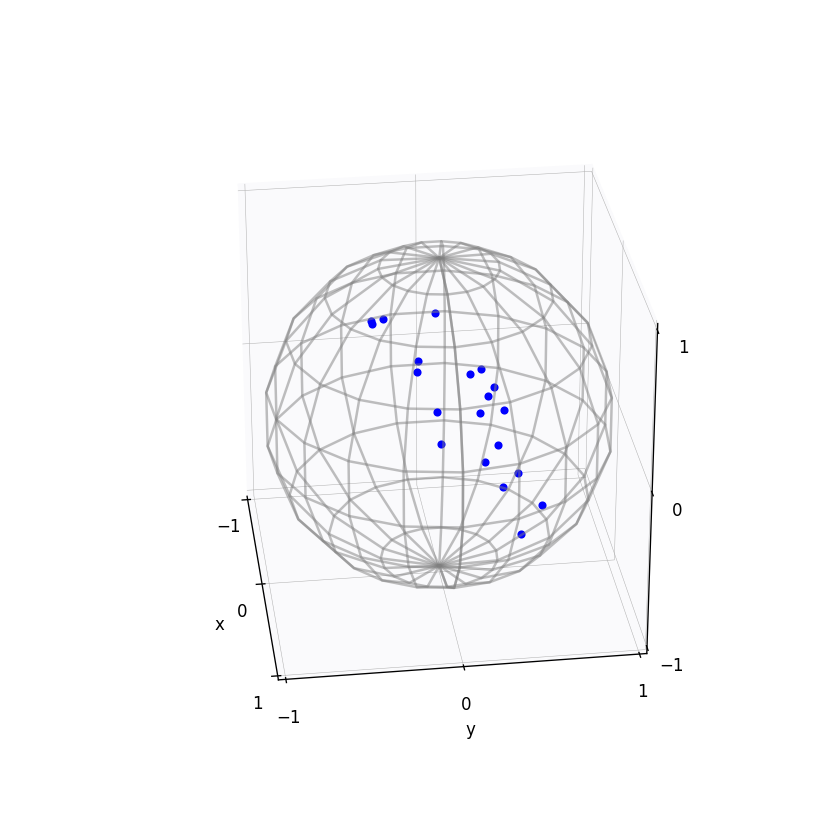

In [39]:
#newfig()
M.plot()
for i in range(n_samples.get_value()):
    M.plotx(y[i,:])
#plt.show()

# Estimation of parameters

In [ ]:
W0 = np.array([[np.linalg.norm(ui0)]])[0:mx.get_value(),0:mx.get_value()]
drift0 = np.array([0.01,0.01])[0:mx.get_value()]

tau0 = 0.1

y0 = np.mean(yObs, axis = 0)

para0 = np.hstack((tau0,drift0,W0.flatten(),y0.flatten(),ui0.flatten()))
print("Initial para = ", para0)